# Date-A-Scientist

## Introduction

This project analyzes data from OKCupid, an on-line dating application. Some people believe in using astrological signs to determine potential compatibility between people. The goal of this project is to analyze the sample profiles provided and to create a machine learning model to predict astrological signs in instances where respondents may have left it out.

#### Data sources:

The csv file analyzed was provided by Codecademy.

## Scoping

Describe the characteristics of the data
    
Visualize/Analyze Data to answer some questions:
- Continuous Variables
- Discreet Variables
- Categorical Variables
        
Preprocess Data for modeling:
- Decide what to do about the missing values, select columns for modeling, and transform variables to be model-ready
- Label Balance/Imbalance Check
- Splitting Data
        
Model Implementation and Evaluation
- Logistic Regression
- Decision Trees
        
Conclusion and Recommendations

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

The `profiles.csv` file, loaded into `profiles`, contain data on the different attributes of diverse respondents. 


### Data Characteristics:

`profiles` include 31 columns and 59,946 rows. There are missing values in 24 of 31 columns. The columns include:

**age**: ages of respondents.

**body_type**: categories of body types

**diet**:categories of diet lifestyle

**drinks**: how often a respondent drinks alcohol

**drugs**: how often a respondent uses (hard) drugs

**education**: education level of respondents

**essay0 - essay9**: essays on who respondents are & what they like

**ethnicity**: ethnic origin(s) of respondents

**height**: respondents' height measurements

**income**: how much respondents make annually (in USD)

**job**: respondents' job field

**last_online**: most recent time online

**location**: respondents' geographical location

**offspring**: if respondents have, want kids or does not

**orientation**: sexual orientation of respondents

**pets**: if respondents likes, has pet(s) or not

**religion**: respondents' religion 

**sex**: respondents' gender (male/female)

**sign**: respondents' zodiac sign

**smokes**: if respondents smokes or not & how often

**speaks**: what language(s) respondents speak and how proficiently

**status**: respondents' (romantic) relationship status

In [2]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')

In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [4]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [5]:
profiles.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [6]:
profiles.loc[0]

age                                                           22
body_type                                         a little extra
diet                                           strictly anything
drinks                                                  socially
drugs                                                      never
education                          working on college/university
essay0         about me:<br />\n<br />\ni would love to think...
essay1         currently working as an international agent fo...
essay2         making people laugh.<br />\nranting about a go...
essay3         the way i look. i am a six foot half asian, ha...
essay4         books:<br />\nabsurdistan, the republic, of mi...
essay5         food.<br />\nwater.<br />\ncell phone.<br />\n...
essay6                               duality and humorous things
essay7         trying to find someone to hang out with. i am ...
essay8         i am new to california and looking for someone...
essay9         you want t

In [7]:
profiles.age.unique()

array([ 22,  35,  38,  23,  29,  32,  31,  24,  37,  28,  30,  39,  33,
        26,  27,  20,  25,  40,  36,  21,  34,  43,  46,  41,  42,  45,
        18,  55,  50,  59,  44,  48,  54,  51,  62,  52,  19,  58,  66,
        53,  63,  47,  49,  61,  60,  57,  56,  65,  64,  68, 110,  69,
        67, 109])

In [8]:
profiles.body_type.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [9]:
profiles.education.unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school', 'med school'], dtype=object)

In [10]:
profiles.height.unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

In [11]:
profiles.income.unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000])

In [12]:
profiles.job.unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [13]:
profiles.last_online.unique()

array(['2012-06-28-20-30', '2012-06-29-21-41', '2012-06-27-09-10', ...,
       '2012-06-02-08-16', '2012-02-17-20-44', '2012-06-14-16-51'],
      dtype=object)

In [14]:
profiles.offspring.unique()

array(['doesn&rsquo;t have kids, but might want them', nan,
       'doesn&rsquo;t want kids',
       'doesn&rsquo;t have kids, but wants them',
       'doesn&rsquo;t have kids', 'wants kids', 'has a kid', 'has kids',
       'doesn&rsquo;t have kids, and doesn&rsquo;t want any',
       'has kids, but doesn&rsquo;t want more',
       'has a kid, but doesn&rsquo;t want more',
       'has a kid, and wants more', 'has kids, and might want more',
       'might want kids', 'has a kid, and might want more',
       'has kids, and wants more'], dtype=object)

In [15]:
profiles.orientation.unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

In [16]:
profiles.pets.unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [17]:
profiles.religion.unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [18]:
profiles.sex.unique()

array(['m', 'f'], dtype=object)

In [19]:
profiles.sign.unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [20]:
profiles.smokes.unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [21]:
profiles.speaks.unique()

array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), hindi (poorly), french (poorly), tamil (okay), spanish (poorly)',
       'english (fluently), french (poorly), japanese (poorly), latin (poorly)',
       'english (fluently), french, farsi'], dtype=object)

In [22]:
profiles.status.unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

<br>

## Data Visualization

### Continuous Variables

#### Height

- Some of the respondents may have innacurately entered their height (e.g 1 inch, 4 inches).
- Some of the males were as tall as 80 inches+ (about 7ft), with most being between 65 and 75 inches
- Some of the females were as tall as 70 inches+ (about 6ft), with most being between 60 and 70 inches

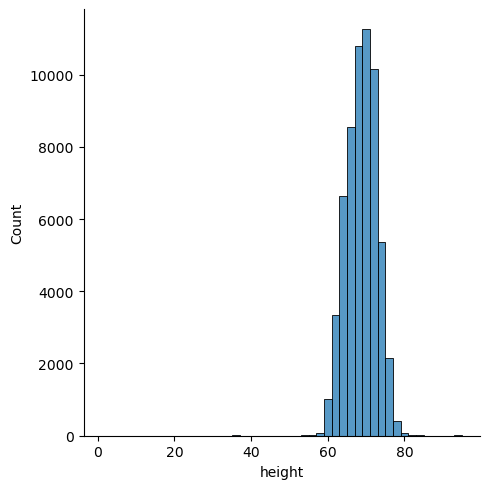

In [23]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 2);

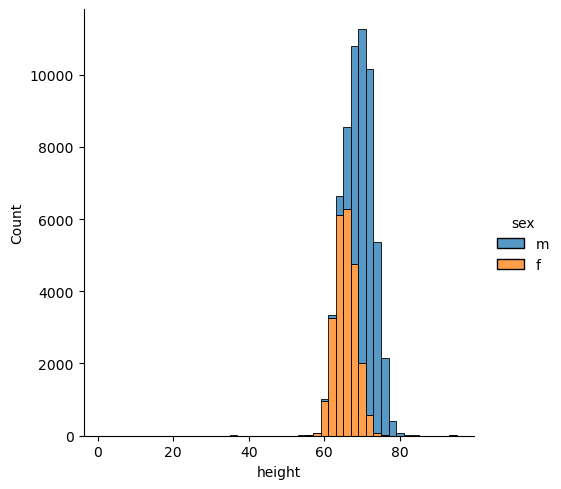

In [24]:
sns.displot(data=profiles, x="height", hue="sex", kind="hist", binwidth = 2, multiple = "stack");

In [25]:
profiles.height.value_counts()

70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      20
57.0      17
83.0      12
81.0      11
82.0      11
36.0      11
84.0       9
56.0       8
55.0       6
53.0       5
94.0       3
54.0       3
91.0       3
50.0       2
88.0       2
37.0       2
48.0       2
43.0       2
1.0        1
51.0       1
90.0       1
26.0       1
85.0       1
9.0        1
89.0       1
92.0       1
87.0       1
49.0       1
47.0       1
6.0        1
42.0       1
86.0       1
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: height, dtype: int64

#### Income

- This data shows that ~80% of respondents are currently not earning an income
- Less than 1% of respondents earn a million dollars annualy. 

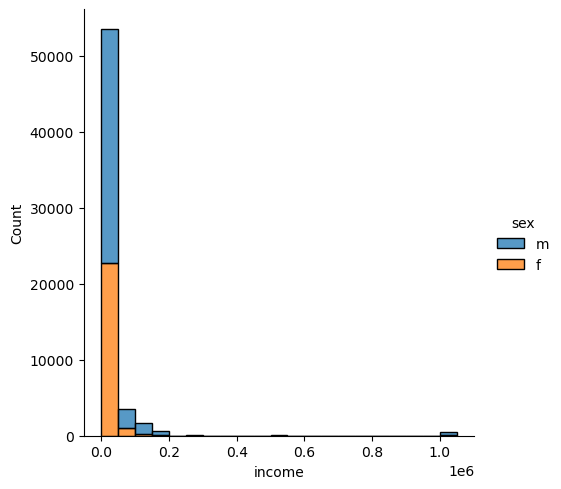

In [26]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

In [27]:
profiles.groupby(['income'])['sex'].value_counts()

income    sex
-1        m      27438
          f      21004
 20000    m       1921
          f       1031
 30000    m        728
          f        320
 40000    m        666
          f        339
 50000    m        664
          f        311
 60000    m        515
          f        221
 70000    m        541
          f        166
 80000    m        850
          f        261
 100000   m       1365
          f        256
 150000   m        556
          f         75
 250000   m        144
          f          5
 500000   m         45
          f          3
 1000000  m        396
          f        125
Name: sex, dtype: int64

### Discrete Variables


#### Age

- Majority of the respondents are between 25 and 40 years of age

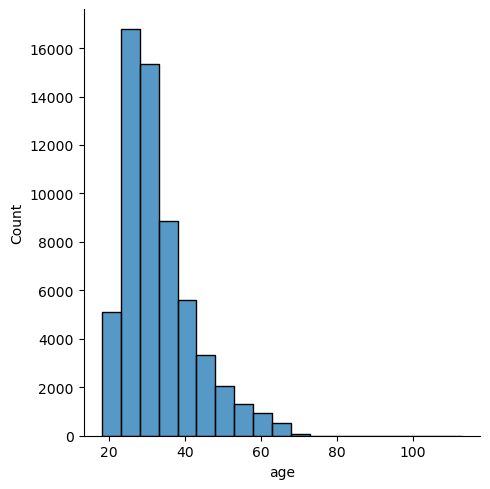

In [28]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

<Figure size 600x600 with 0 Axes>

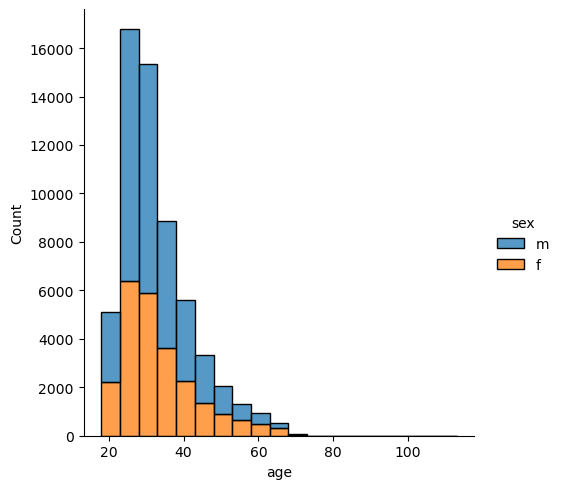

In [29]:
plt.clf()
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

In [30]:
profiles.age.value_counts()

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64

### Categorical Variables

#### Sex

- There are more males represented in the `profiles` dataset than females

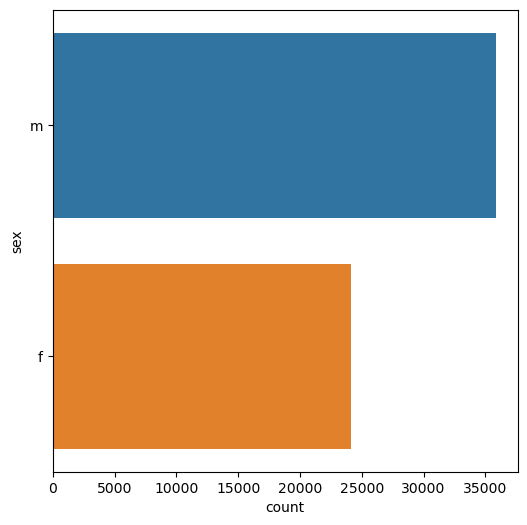

In [31]:
sns.countplot(data=profiles, y="sex");

#### Body Type

- More women identifies with terms like `curvy` and `full figured` than men
- More men seem to identify with `athletic`

<AxesSubplot:xlabel='count', ylabel='body_type'>

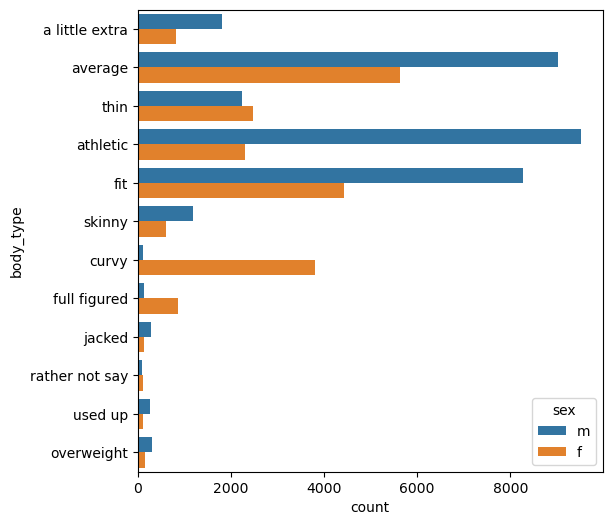

In [32]:
sns.countplot(data=profiles, y="body_type", hue='sex')

#### Diet

- Most of the respondents eat `mostly anything`

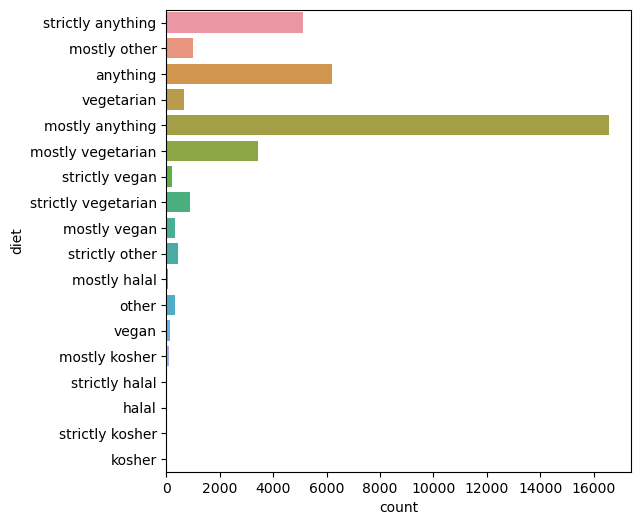

In [33]:
sns.countplot(data=profiles, y="diet");

#### Drinks

- Most of the respondents often drink while they are socializing

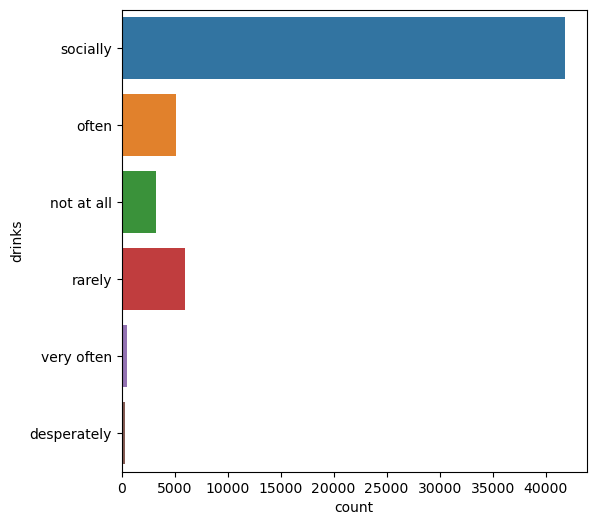

In [34]:
sns.countplot(data=profiles, y="drinks");

#### Drugs

- A large percentage of the respondents have never used (hard) drugs

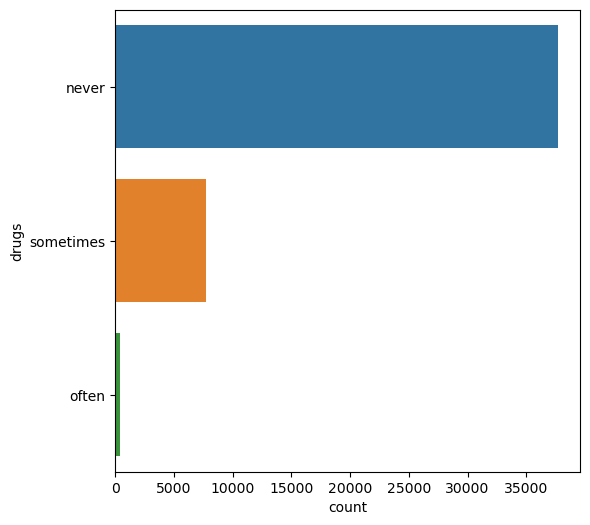

In [35]:
sns.countplot(data=profiles, y="drugs");

#### Education

- Most of the respondents have a bachelor's degree

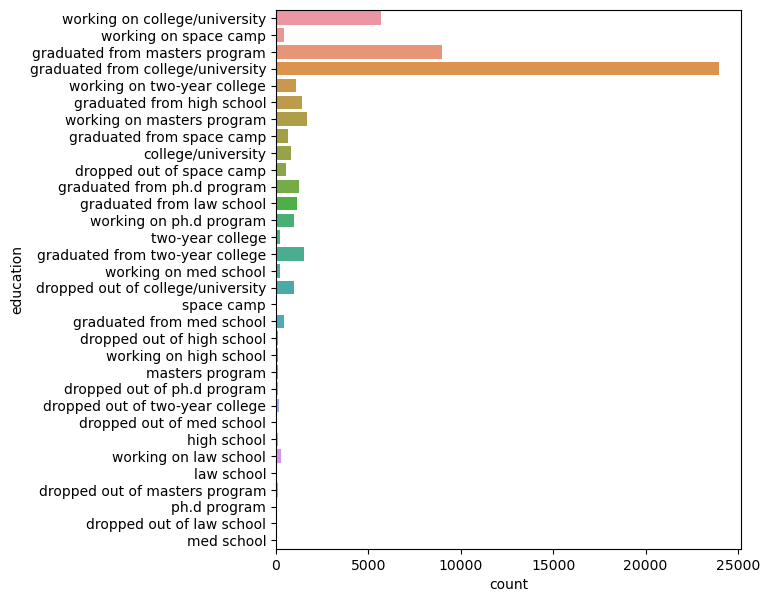

In [36]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

#### Jobs

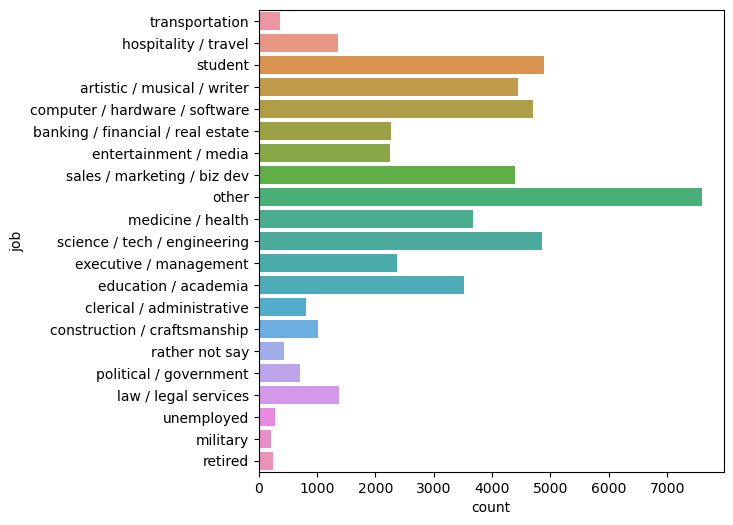

In [37]:
sns.countplot(data=profiles, y="job");

#### Offspring

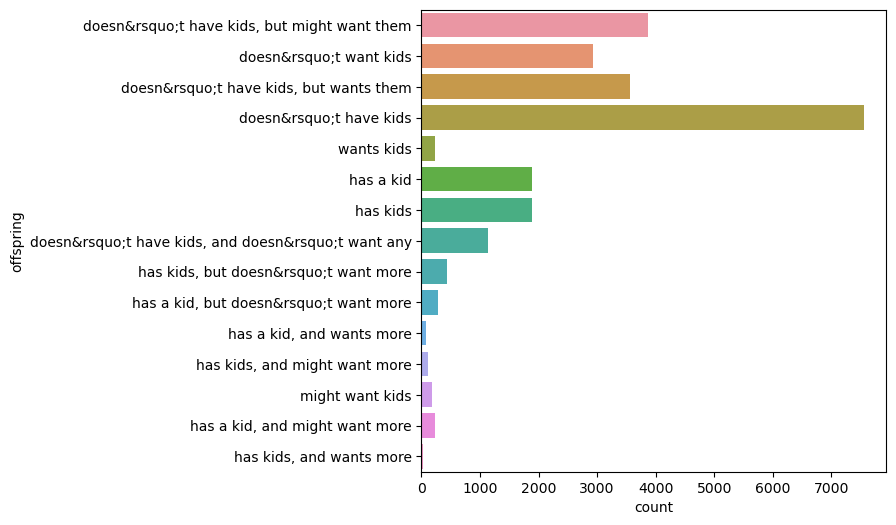

In [38]:
sns.countplot(data=profiles, y="offspring");

#### Orientation

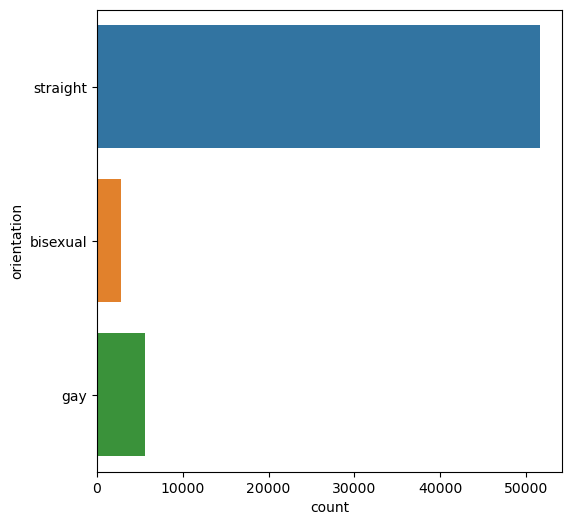

In [39]:
sns.countplot(data=profiles, y="orientation");

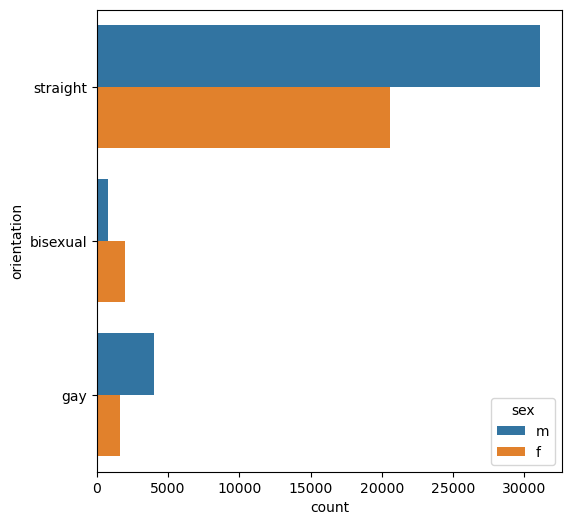

In [40]:
sns.countplot(data=profiles, y="orientation", hue='sex');

#### Pets

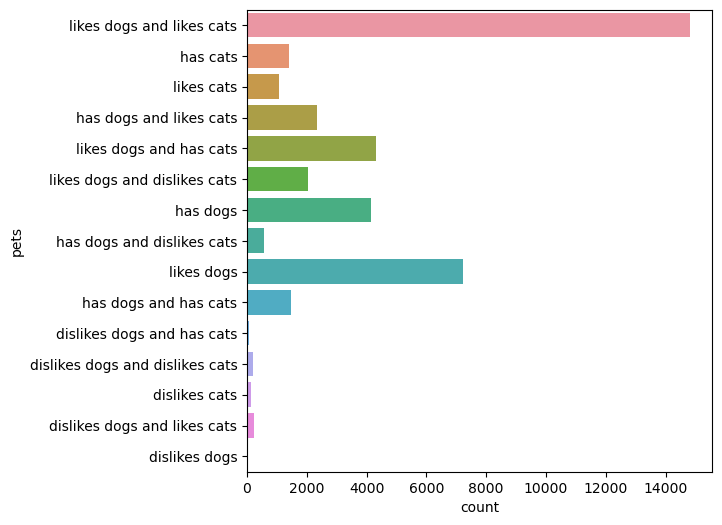

In [41]:
sns.countplot(data=profiles, y="pets");

#### Religion

- The religion column is cleaned to only retain religion (names) using the str.split() method
- The `religion` column is renamed as `religionCleaned`

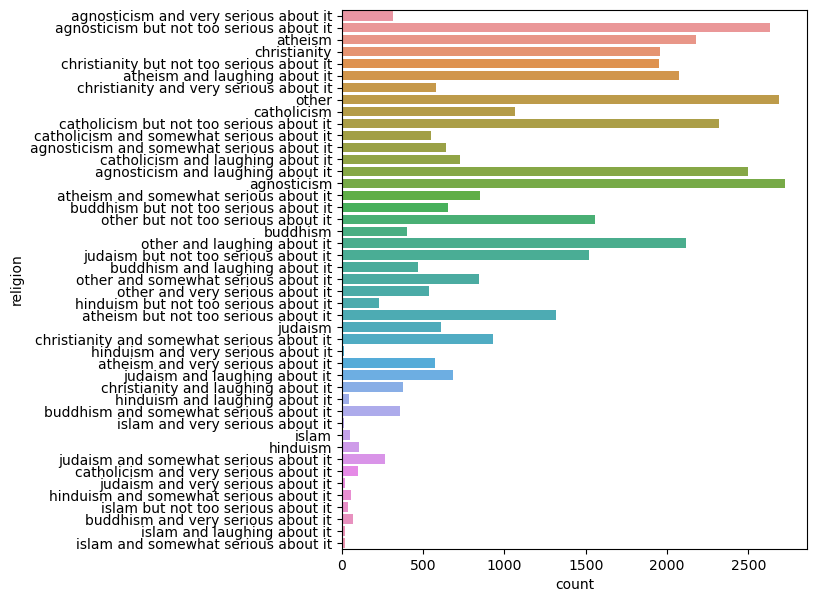

In [42]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

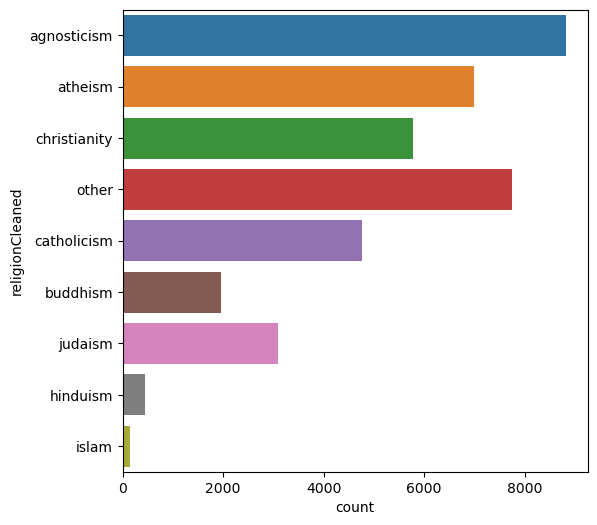

In [43]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

#### Signs

- The sign column is cleaned to only retain the astrological signs (names) using the str.split() method
- The `sign` column is renamed as `signCleaned`

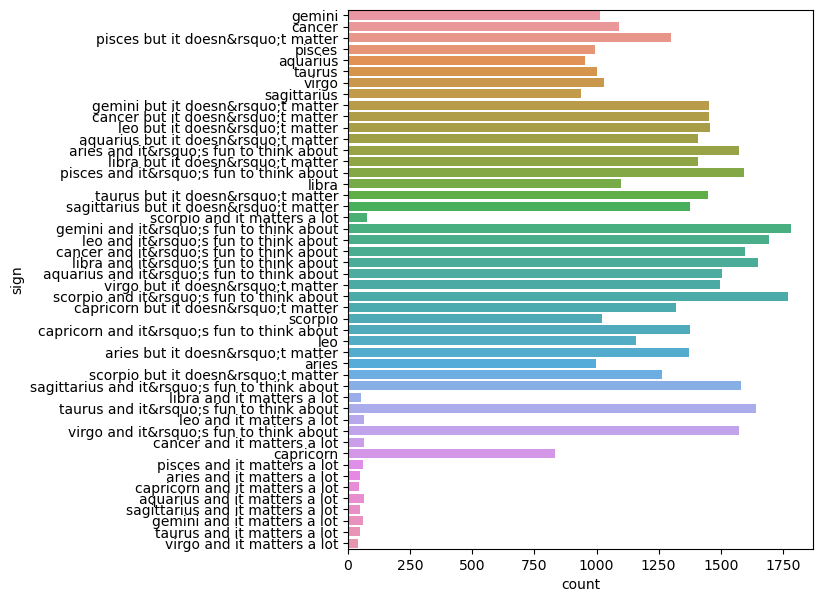

In [44]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="sign");

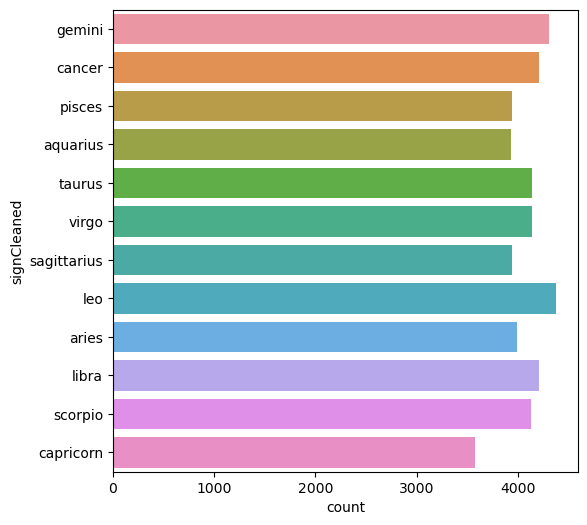

In [45]:
profiles['signCleaned'] = profiles.sign.str.split().str.get(0)
sns.countplot(data=profiles, y="signCleaned");

#### Smoking

- Most of the respondents do not smoke.

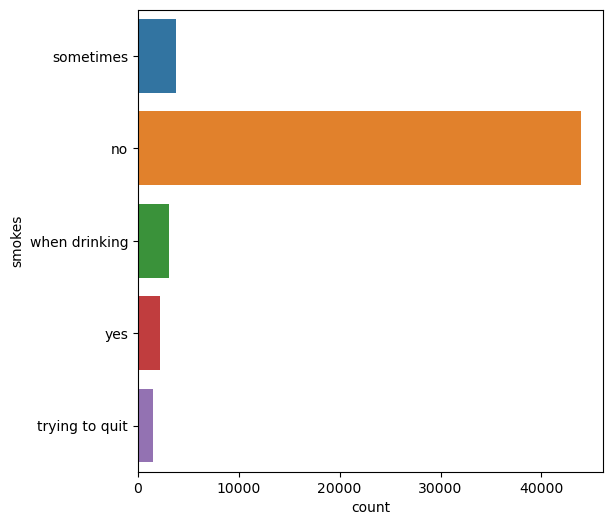

In [46]:
sns.countplot(data=profiles, y="smokes");

#### Status

- Most of the respondents are single

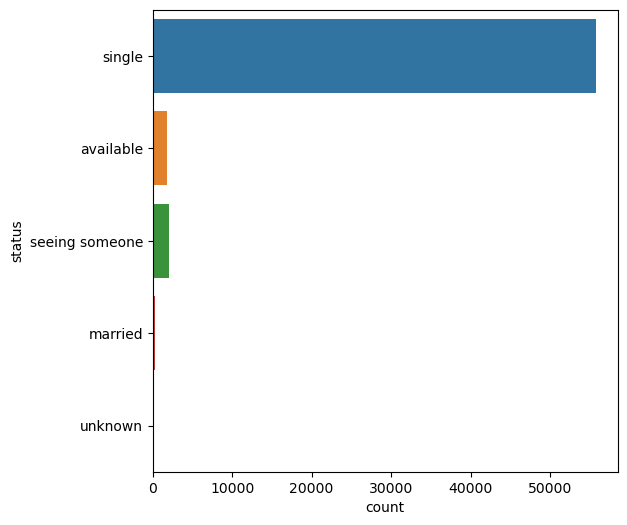

In [47]:
sns.countplot(data=profiles, y="status");

#### Geographical Location

- ~99% of respondents's entered `california` as their location
- The location column is cleaned to only retain the states (names) using the str.split() method
- The `location` column is renamed as `locationCleaned`

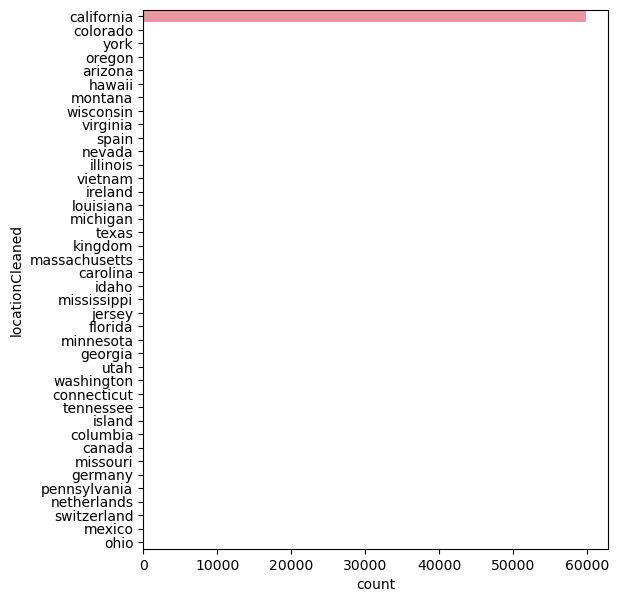

In [48]:
plt.figure(figsize=(6,7))
profiles['locationCleaned'] = profiles.location.str.split().str.get(-1)
sns.countplot(data=profiles, y="locationCleaned");

In [49]:
profiles['locationCleaned'].value_counts()

california       59855
york                17
illinois             8
massachusetts        5
michigan             4
texas                4
oregon               4
florida              3
arizona              3
virginia             3
washington           2
utah                 2
kingdom              2
georgia              2
minnesota            2
columbia             2
colorado             2
ohio                 2
spain                2
hawaii               2
louisiana            1
island               1
mexico               1
switzerland          1
netherlands          1
pennsylvania         1
germany              1
missouri             1
canada               1
tennessee            1
carolina             1
connecticut          1
montana              1
wisconsin            1
nevada               1
vietnam              1
jersey               1
mississippi          1
ireland              1
idaho                1
Name: locationCleaned, dtype: int64

<br>

## Data Preprocessing

Missing Values
- Null values are dropped
- There are now 16,453 rows

Columns' Selection
- Seven independent features were selected
- `signCleaned` is assigned as the dependent feature/label

Data Transformation
- Using a for loop & pd.get_dummies(), (categorical) variables are transformed into dummy variables
- We ended up with 81 columns

In [50]:
profilesCleaned = profiles[['body_type', 'diet', 'job', 'orientation', 'pets', 'religionCleaned', 'sex', 'signCleaned']]

In [51]:
profilesCleaned = profilesCleaned.dropna()
profilesCleaned.reset_index(inplace=True, drop=True)

In [52]:
profilesCleaned

,body_type,diet,job,orientation,pets,religionCleaned,sex,signCleaned
0,a little extra,strictly anything,transportation,straight,likes dogs and likes cats,agnosticism,m,gemini
1,average,mostly other,hospitality / travel,straight,likes dogs and likes cats,agnosticism,m,cancer
2,average,mostly anything,computer / hardware / software,straight,likes cats,atheism,m,taurus
3,average,mostly anything,artistic / musical / writer,straight,likes dogs and likes cats,christianity,f,sagittarius
4,athletic,mostly anything,student,straight,likes dogs and likes cats,atheism,m,cancer
...,...,...,...,...,...,...,...,...
16448,average,strictly vegetarian,artistic / musical / writer,straight,has dogs and likes cats,atheism,m,pisces
16449,curvy,anything,political / government,gay,likes dogs and likes cats,other,m,aries
16450,average,anything,other,straight,has dogs and has cats,judaism,f,pisces
16451,fit,mostly anything,entertainment / media,straight,likes dogs and likes cats,agnosticism,m,leo


In [53]:
profilesCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16453 entries, 0 to 16452
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   body_type        16453 non-null  object
 1   diet             16453 non-null  object
 2   job              16453 non-null  object
 3   orientation      16453 non-null  object
 4   pets             16453 non-null  object
 5   religionCleaned  16453 non-null  object
 6   sex              16453 non-null  object
 7   signCleaned      16453 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


In [54]:
columns = ['body_type', 'diet', 'job', 'orientation', 'pets', 'religionCleaned', 'sex', 'signCleaned']
for column in columns[:-1]:
    profilesCleaned = pd.get_dummies(profilesCleaned, columns=[column], prefix=[column])

In [55]:
profilesCleaned.head()

,signCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,religionCleaned_atheism,religionCleaned_buddhism,religionCleaned_catholicism,religionCleaned_christianity,religionCleaned_hinduism,religionCleaned_islam,religionCleaned_judaism,religionCleaned_other,sex_f,sex_m
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,taurus,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,cancer,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


### Label Balance/Imbalance Check

Nothing to worry about here since the counts of signCleaned's categories are about the same.

In [56]:
profilesCleaned.signCleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signCleaned, dtype: int64

### Splitting Data

- `profilesCleaned`'s independent features are splitted into training and validation sets

In [57]:
col_length = len(profilesCleaned.columns)
feature = profilesCleaned.iloc[:, 1:col_length]
label = profilesCleaned.iloc[:, 0:1]

feature_train, feature_val, label_train, label_val = train_test_split(feature, label, test_size = 0.25, random_state = 1)

#transform in to 1d array
label_train = label_train.to_numpy().ravel()
label_val = label_val.to_numpy().ravel()

<br>

## Model Implementation and Evaluation

### Logistic Regression

- Logistic Regression model's accuracy, `lr.score()`, is poor
- classification report is also poor

In [58]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(feature_train, label_train)

LogisticRegression(multi_class='multinomial')

In [59]:
print('Train Score:')
lr.score(feature_train, label_train)

Train Score:


0.12456438933463003

In [60]:
print('Test Score:')
lr.score(feature_val, label_val)

Test Score:


0.08726300437530383

In [61]:
lr_pred = lr.predict(feature_train)
print(classification_report(label_train, lr_pred))

              precision    recall  f1-score   support

    aquarius       0.12      0.07      0.09       936
       aries       0.13      0.12      0.12      1017
      cancer       0.12      0.13      0.13      1072
   capricorn       0.14      0.03      0.05       905
      gemini       0.13      0.17      0.15      1114
         leo       0.13      0.20      0.16      1123
       libra       0.12      0.14      0.13      1054
      pisces       0.13      0.11      0.12       980
 sagittarius       0.12      0.11      0.11       982
     scorpio       0.13      0.08      0.10      1001
      taurus       0.11      0.10      0.10      1045
       virgo       0.12      0.20      0.15      1110

    accuracy                           0.12     12339
   macro avg       0.13      0.12      0.12     12339
weighted avg       0.13      0.12      0.12     12339



In [62]:
coef_df = pd.DataFrame(zip(feature_train.columns, lr.coef_[0]), columns=['var', 'coef']).sort_values('coef')

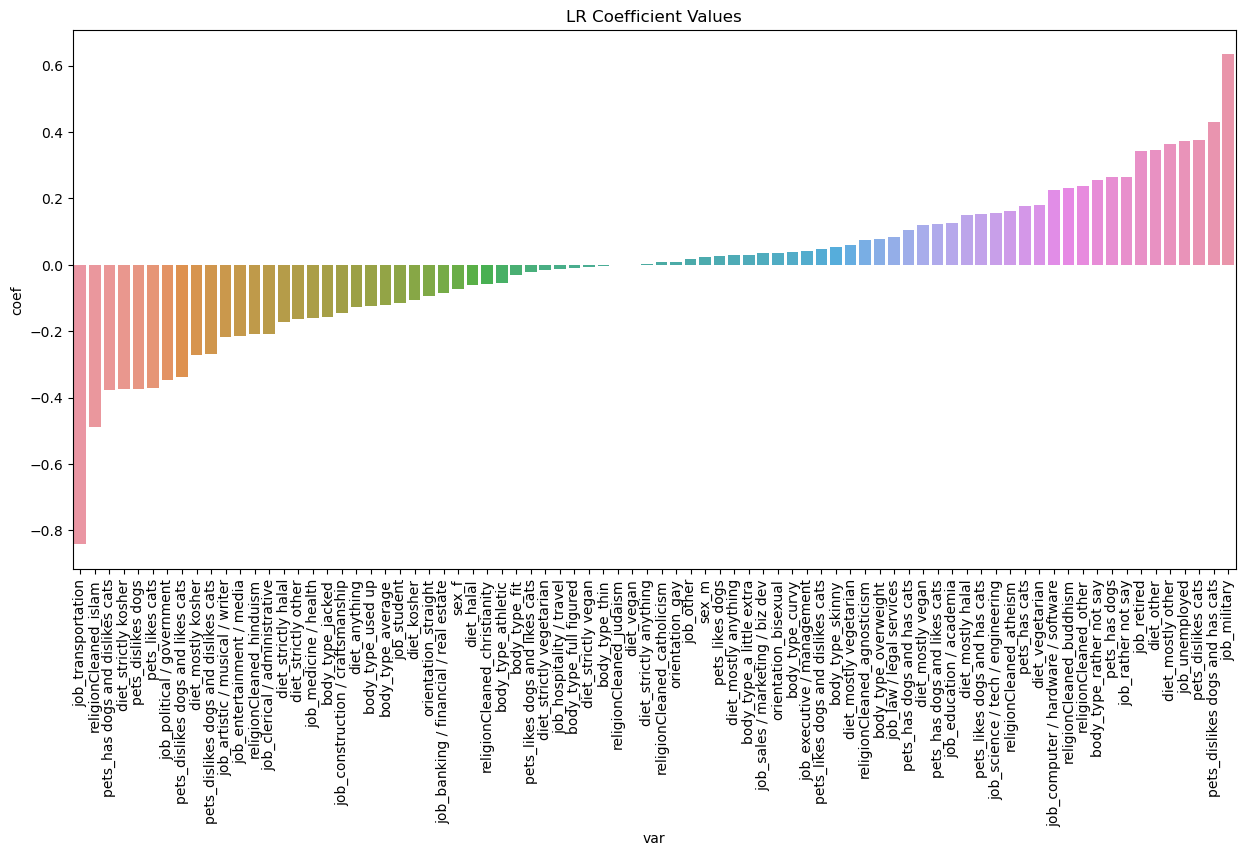

In [63]:
plt.figure(figsize = (15,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90);
plt.title('LR Coefficient Values')
plt.show()
plt.close()

<br>

### Decision Trees

**dt**:
- DecisionClassifier, dt, gives an accuracy of ~0.78 (Train) & ~0.09 (Test), without specifying a max_depth
- The classification report are not the best but are better than `lr`
- Baseline is averaging ~8%

In [64]:
dt = DecisionTreeClassifier()
dt.fit(feature_train, label_train)

DecisionTreeClassifier()

In [65]:
print('Train Score:')
dt.score(feature_train, label_train)

Train Score:


0.7799659615852176

In [66]:
print('Test Score:')
dt.score(feature_val, label_val)

Test Score:


0.0904229460379193

In [67]:
dt_pred = dt.predict(feature_train)
print(classification_report(label_train, dt_pred))

              precision    recall  f1-score   support

    aquarius       0.64      0.94      0.76       936
       aries       0.68      0.89      0.77      1017
      cancer       0.68      0.86      0.76      1072
   capricorn       0.74      0.84      0.79       905
      gemini       0.77      0.81      0.79      1114
         leo       0.80      0.80      0.80      1123
       libra       0.81      0.76      0.78      1054
      pisces       0.84      0.72      0.78       980
 sagittarius       0.92      0.68      0.79       982
     scorpio       0.92      0.70      0.79      1001
      taurus       0.90      0.71      0.79      1045
       virgo       0.94      0.66      0.78      1110

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



In [68]:
dt.get_depth()

61

In [69]:
#cross validation

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
dt_results = cross_val_score(dt, feature_train, label_train, cv=kfold, scoring='accuracy')

print(dt_results)
print("Baseline: %.2f%% (%.2f%%)" % (dt_results.mean()*100, dt_results.std()*100))

[0.0863047  0.0863047  0.08387358 0.08549433 0.08228618]
Baseline: 8.49% (0.16%)


**dt2**:

- DecisionClassifier, dt2, gives an accuracy of ~0.78 (Train) & ~0.09 (Test), without a specified max_depth of 57
- The classification report are about the same as `dt`
- Baseline is averaging ~8.5%

In [70]:
dt2 = DecisionTreeClassifier(max_depth=57)
dt2.fit(feature_train, label_train)

DecisionTreeClassifier(max_depth=57)

In [71]:
print('Train Score:')
dt2.score(feature_train, label_train)

Train Score:


0.7793176108274577

In [72]:
print('Test Score:')
dt2.score(feature_val, label_val)

Test Score:


0.08896451142440447

In [73]:
dt2_pred = dt2.predict(feature_train)
print(classification_report(label_train, dt2_pred))

              precision    recall  f1-score   support

    aquarius       0.64      0.94      0.76       936
       aries       0.67      0.90      0.77      1017
      cancer       0.68      0.86      0.76      1072
   capricorn       0.74      0.84      0.79       905
      gemini       0.77      0.81      0.79      1114
         leo       0.80      0.80      0.80      1123
       libra       0.81      0.76      0.78      1054
      pisces       0.84      0.72      0.78       980
 sagittarius       0.92      0.68      0.78       982
     scorpio       0.92      0.70      0.79      1001
      taurus       0.89      0.71      0.79      1045
       virgo       0.94      0.66      0.78      1110

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



In [74]:
#cross validation

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
dt2_results = cross_val_score(dt2, feature_train, label_train, cv=kfold, scoring='accuracy')

print(dt2_results)
print("Baseline: %.2f%% (%.2f%%)" % (dt2_results.mean()*100, dt2_results.std()*100))

[0.08752026 0.0834684  0.09076175 0.08549433 0.08471828]
Baseline: 8.64% (0.26%)


**Moving forward with `dt`**

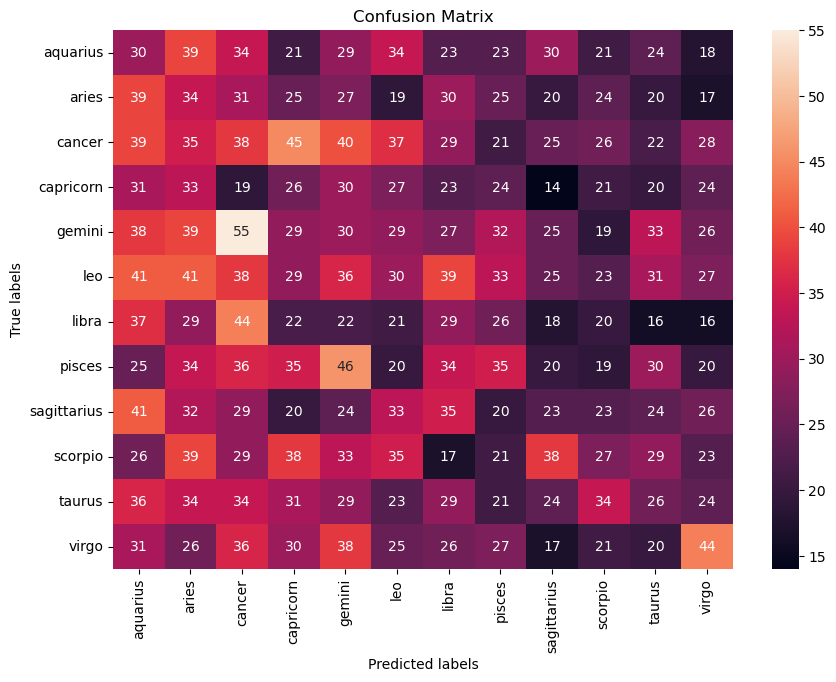

In [75]:
#Confusion Matrix of `dt`

dt_pred_val = dt.predict(feature_val) 

cm1 = confusion_matrix(label_val, dt_pred_val)
dt_labels = dt.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dt_labels); 
ax.yaxis.set_ticklabels(dt_labels);

## Conclusion & Recommendation

Logistic Regression and Decision Tree Classifier were used to predict astrological signs in this Machine Learning Project. The predictive power of the algorithms could be improved by using additional models, by tuning the hyperparameters of the models built or considering other attributes/features to be included in the model building process.